In incidence geometry, a **plane** $\pi=(S,\mathscr L)$ consists of a set of points $S$, a collection $\mathscr L$ of subsets of $S$. Two lines $\ell$ and $m$ in $\mathscr L$ are **parallel**, denoted $\ell\parallel m$, if $\ell=m$ or $\ell\cap m=\emptyset$. The **parallel class** $[\ell]$ of a line $\ell$ is the set of lines which are parallel to $\ell$:
$$[l]=\{m\in\mathscr L:m\parallel l\}$$
Three points $P$, $Q$, and $R$ are **non-collinear** if no line contains all three points.

An **affine plane** is a plane $\pi=(S,\mathscr L)$ which satisfies three axioms:

A1. For every distinct pair of points $A$ and $B$ in $S$, there exists exactly one line denoted $AB$ passing through the points $A$ and $B$.
    
A2. For every line $\ell\in\mathscr L$ and every point $A\in S$ such that $P$ does not lie on $\ell$, there exists exactly one line $m\in\mathscr L$ containing $A$ which is parallel to $\ell\parallel m$.
    
A3. There exist three noncollinear points

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy

The smallest affine plane has 4 points and 6 lines:

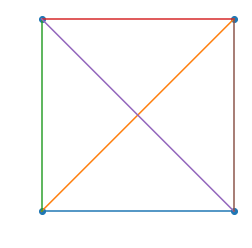

In [23]:
plt.axis('off')
plt.scatter([0,0,1,1],[0,1,0,1])
plt.plot([0,1],[0,0])
plt.plot([0,1],[0,1])
plt.plot([0,0],[0,1])
plt.plot([0,1],[1,1])
plt.plot([0,1],[1,0])
plt.plot([1,1],[0,1])
plt.axis('scaled')
plt.show()

**Theorem 1.** Let $\pi$ be an affine plane. Then there is a bijection between each pair of lines of $\pi$.

Theorem 1 allows us to make the following definition:

**Definition:** An **affine plane of order $n$** is an affine plane in which all lines contain $n$ points.

**Theorem 2.** Let $\pi$ be an affine plane of order $n$. Then:

1. $\pi$ contains $n^2$ points

2. Each points lies on $n+1$ lines

3. There are $n$ parallel classes

4. Each parallel class contains $n$ lines 

5. There are $n(n+1)$ lines

**Theorem 3.** There exists an affine plane of order $p$ for every prime $p$.

**Theorem 4.** There do not exist affine planes of order 6 or 10.

**Conjecture:** There does not exist an affine plane of order 12.

Here is a naive algorithm to determine whether an arbitrary plane $(S,\mathscr L)$ is an affine plane:

In [38]:
def parallel(l, m):
    if l == m:
        return True
    elif len([P for P in l if P in m]) == 0:
        return True
    else:
        return False

In [116]:
def isAffinePlane(S, L):
    for A in S:
        for B in S:
            if not A == B:
                if len([l for l in L if A in l and B in l]) != 1:
                    return False
        for l in L:
            if not A in l:
                if len([m for m in L if A in m and parallel(l, m)]) != 1:
                    return False
    for A in S:
        for B in S:
            for C in S:
                if not A == B and not A == C and not B == C:
                    for l in L:
                        if (A in l) and (B in l) and not C in l:
                            return True
    return False

In [117]:
S = [1,2,3,4]

In [118]:
L = [[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]]

In [119]:
isAffinePlane(S,L)

True

For an affine plane of order $n$ with $n^2$ points and $n(n+1)$ lines we define the **incidence matrix** to be a $n^2\times n(n+1)$ matrix where the entry at $(i,j)$ is $1$ if the $i^\text{th}$ point lies on the $j^\text{th}$ line and $0$ otherwise.

$$I_{ij}=\begin{cases}1,&S_i\in L_j\\0,&S_i\notin L_j\end{cases}$$

For example, the incidence matrix corresponding to the 4-point affine plane is:

$$\left[\begin{array}{cccccc}1&1&1&0&0&0\\1&0&0&1&1&0\\0&1&0&1&0&1\\0&0&1&0&1&1\end{array}\right]$$

Given a specific indicidence matrix $I$, the time to check whether $I$ corresponds to an affine plane is $O(n^8)$. To perform this check for all incidence matrices we check $2^{n^2*n(n+1)}$. Thus the time to check whether an affine plane of order $n$ exists is $O(n^82^{n^4})$ (proof?) For order 12, we perform approximately $10^{54000}$ operations. This is not good. However, hopefully we can use Theorem 2 and plane isomorphism to reduce this number. For now we would like to use computational methods to disprove the existence of orders $n=6$ and $n=10$.

In [171]:
def plotPlane(S, L):
    n = len(S)
    R = np.random.rand(n, 2)
    x = [z[0] for z in R]
    y = [z[1] for z in R]
    plt.scatter(x, y)
    for l in L:
        m = len(l)
        T = []
        for P in range(m):
            T += embedPoints(5) + R[P]
        hull = scipy.spatial.ConvexHull(T)
        for simplex in hull.simplices:
            plt.plot(T[simplex,0], T[simplex,1], 'k-')

In [36]:
def embedPoints(n):
    return np.array([(np.cos(i/n *2*np.pi), np.sin(i/n *2*np.pi)) for i in range(n)])